In [1]:
from DLstorm.Model import Model
from DLstorm.Layers.Initializers import Xavier, He, UniformRandom, Constant
from DLstorm.Layers.Conv import Conv2d
from DLstorm.Layers.BatchNormalization import BatchNorm2d
from DLstorm.Layers.Pooling import MaxPool2d
from DLstorm.Layers.Flatten import Flatten
from DLstorm.Layers.Dropout import Dropout
from DLstorm.Layers.FullyConnected import Linear
from DLstorm.Layers.ReLU import ReLU
from DLstorm.Layers.SoftMax import SoftMax
from DLstorm.Optimization.Loss import CrossEntropyLoss
from DLstorm.Optimization.Optimizers import Adam, SgdWithMomentum, Sgd


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
input_folder_path = "Data/"
train_df = pd.read_csv(input_folder_path+"train.csv")[:100]
test_df = pd.read_csv(input_folder_path+"test.csv")

train_labels = train_df['label'].values
train_images = (train_df.iloc[:, 1:].values).astype('float32')
test_images = (test_df.iloc[:, :].values).astype('float32')

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels,
                                                                      stratify=train_labels, random_state=123,
                                                                      test_size=0.20)
train_images = train_images.reshape(train_images.shape[0], 28, 28)
val_images = val_images.reshape(val_images.shape[0], 28, 28)
test_images = test_images.reshape(test_images.shape[0], 28, 28)

train_images = train_images/255.0
val_images = val_images/255.0
test_images = test_images/255.0

classes = 10

train_images = np.expand_dims(train_images, axis=1)
train_labels = train_labels.reshape(-1)
train_labels = np.eye(classes)[train_labels]
val_images = np.expand_dims(val_images, axis=1)
val_labels = val_labels.reshape(-1)
val_labels = np.eye(classes)[val_labels]

In [3]:
layers = [
    Conv2d(in_channels=1, out_channels=4,
           kernel_size=3, stride=1, padding='same'),
    BatchNorm2d(4),
    Dropout(0.3),
    ReLU(),
    MaxPool2d(kernel_size=2, stride=2),
    Conv2d(in_channels=4, out_channels=4,
           kernel_size=3, stride=1, padding='same'),
    BatchNorm2d(4),
    ReLU(),
    MaxPool2d(kernel_size=2, stride=2),
    
    Flatten(),
    
    Linear(in_features=4*7*7, out_features=32),
#     Dropout(0.3),
    ReLU(),
    Linear(32, 10),
    SoftMax(),
]

model = Model(layers)

In [4]:
batch_size = 16
model.compile(optimizer=Adam(learning_rate=5e-3, mu=0.98, rho=0.999), loss=CrossEntropyLoss(),
              batch_size=batch_size, metrics=['accuracy'])

In [6]:
epochs = 5
history = model.fit(x_train=train_images, y_train=train_labels,
                    x_val=val_images, y_val=val_labels, epochs=epochs)

Epoch 1: 
Train loss: 21.52
Train accuracy: 0.575
Val loss: 31.94
Val accuracy: 0.4

Epoch 2: 
Train loss: 19.42
Train accuracy: 0.6
Val loss: 29.11
Val accuracy: 0.45

Epoch 3: 
Train loss: 16.75
Train accuracy: 0.75
Val loss: 24.31
Val accuracy: 0.7

Epoch 4: 
Train loss: 14.01
Train accuracy: 0.7125
Val loss: 27.98
Val accuracy: 0.6

Epoch 5: 
Train loss: 12.94
Train accuracy: 0.775
Val loss: 28.32
Val accuracy: 0.55



In [8]:
history

{'accuracy': 0.775,
 'val_accuracy': 0.55,
 'loss': [21.524791147799082,
  19.416960395057338,
  16.74894981061589,
  14.008413746663738,
  12.935036054491638],
 'predictions': [array([[1.27922945e-01, 1.14496857e-01, 1.08034074e-01, 9.16336338e-02,
          1.50029881e-01, 7.66571499e-02, 8.62476926e-02, 5.91567374e-02,
          1.08093269e-01, 7.77277604e-02],
         [1.13071252e-01, 2.20332378e-02, 1.57309117e-01, 2.42494853e-02,
          8.50840541e-02, 1.83196751e-01, 3.66504573e-01, 4.43535096e-02,
          7.77169252e-04, 3.42085089e-03],
         [1.20857587e-01, 6.98817349e-03, 1.30262369e-02, 7.45016512e-03,
          7.70423468e-01, 3.38757693e-02, 1.28475522e-02, 6.18330411e-03,
          1.58652332e-02, 1.24825110e-02],
         [1.08112584e-01, 1.04648370e-01, 6.81345727e-02, 2.46102194e-01,
          1.23741319e-01, 4.35697929e-02, 1.46381587e-01, 8.84431008e-02,
          1.52395038e-02, 5.56269755e-02],
         [8.88105525e-02, 1.37438444e-01, 2.11829097e-02, 1.

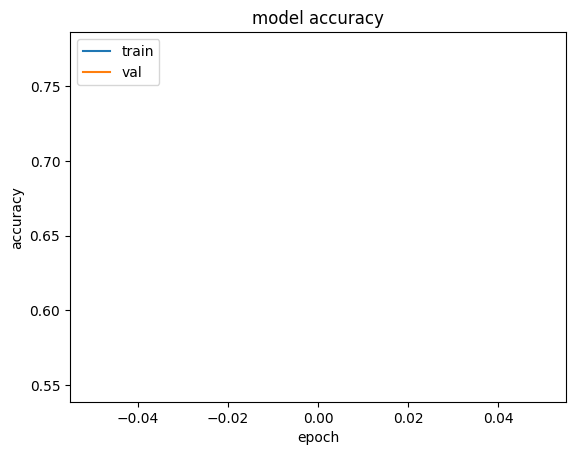

In [7]:
from matplotlib import pyplot as plt
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()